## 2641. Cousins in Binary Tree II

Description:

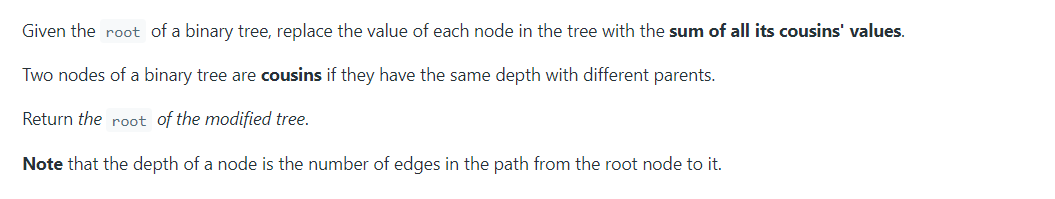

### Examples: